# CMSC320 Final Project
**- Tahmid Hannan**

## Introduction
Hello! This project is a final tutorial project for my CMSC320 class. I will be walking you through the process of obtaining datasets, analyzing it, carrying out hypothesis testing, and then coming to a conclusion.

Looking for datasets to work with can be a bit overwhelming. At first I didn't know what I wanted to work with, but I realized why not work with something I'm curious about? A few days ago, I saw this headline about 41% of high school students in Baltimore earned below 1.0 GPA, and that made me curious as to why that could be? I realized funding is a big issue in a lot of sectors in America - the biggest one being health care. Could it be that even schools are not getting enough funding, therefore resulting in lower student GPA? Keep in mind that the amount of funding a school receives depends a lot on the tax revenue, which would depend on the state citizen's financial status. So anything from revenue and expenditure, to family financial status will be useful for analysis. I could not find anything concrete proving (or disproving) my theory, so I decided to look at datasets consisting of student results of different states on a periodic basis, and also another dataset consisting of some sort of financial data. Luckily, I stumbled upon a dataset that consisted of SAT scores, GPA, and family income status across different states from 2005 to 2015. This dataset was compiled from the information released by National Center for Education Statistics, and can be accessed [here](https://corgis-edu.github.io/corgis/csv/school_scores/). Furthermore, I also found a database on Kaggle which contained every state's expenditure regarding education [here](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/version/4?select=states_all.csv).

## Getting the Data

**Libraries**\
At first, we need to import the libraries we need for this project. All the imported libraries, and their functionalities will be described as we get to them.

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from IPython.display import display, Math
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

pd.options.mode.chained_assignment = None

#### Importing Data
Pandas is a very popular data analysis and manipulation tool built for Python. This library is what will read the dataset, which is stored on my local machine, and create a table/dataframe of it. With the use of pandas, we will be able to manipulate the data as much as we want, with very little (if any) limitations. I also like to make a copy of the original dataset, since it helps me with referencing back to the original dataset if I need to. To combine the two datasets together, I will use pandas's [merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function. The merge function is extremely similar to the function used for SQL merges - mainly for our use, it supports inner merges. I will use inner merge, which combines if both the tables have the same values in the columns I specify. In this case, I need both the tables to match the Year and State. For the expenditure_df dataset, the states are stored in capital letters, and to fix this, I use pandas's [str.title()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.title.html), which only capitalizes the first letter, therefore matching the string format for state in the other dataset.

In [232]:
data_frame = pd.read_csv('school_scores.csv')
expenditure_df = pd.read_csv('states_all.csv')

expenditure_df['STATE'] = expenditure_df['STATE'].str.title()
combined = data_frame.merge(expenditure_df, how = "inner", left_on = ["Year", "State.Name"], right_on = ["YEAR", "STATE"])
education_data = combined.copy()
education_data

,Year,State.Code,State.Name,Total.Math,Total.Test-takers,Total.Verbal,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2005,AL,Alabama,559,3985,567,3.92,2.2,3.53,3.9,...,55919.0,59643.0,43452.0,466164.0,212414.0,741761.0,225.0,262.0,208.0,252.0
1,2005,AK,Alaska,519,3996,523,3.76,1.9,3.35,3.9,...,9495.0,10793.0,9578.0,79377.0,42063.0,133288.0,236.0,279.0,211.0,259.0
2,2005,AZ,Arizona,530,18184,526,3.85,2.1,3.45,3.9,...,80458.0,80683.0,79180.0,645851.0,354901.0,1094454.0,230.0,274.0,207.0,255.0
3,2005,AR,Arkansas,552,1600,563,3.90,2.2,3.61,4.0,...,34951.0,37279.0,29351.0,286781.0,138237.0,474206.0,236.0,272.0,217.0,258.0
4,2005,CA,California,522,186552,504,3.76,1.8,3.32,3.8,...,477828.0,489560.0,423241.0,3848455.0,1953077.0,6437202.0,230.0,269.0,207.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2015,VT,Vermont,524,4564,522,3.81,2.5,3.50,3.9,...,5975.0,6173.0,6271.0,48722.0,26002.0,87866.0,243.0,290.0,230.0,274.0
436,2015,VA,Virginia,517,59621,518,3.83,2.1,3.47,3.9,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
437,2015,WA,Washington,511,44423,502,3.83,2.2,3.50,3.9,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
438,2015,WI,Wisconsin,606,2277,591,3.93,2.6,3.77,4.1,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


## Cleaning and formatting the dataframe


**Getting Column Names**\
Our dataframe has a lot of columns, and while all of them are very useful, we do not have any need to analyze all of them. So I will take a look at all the columns available in our dataset, and filter out the columns which we will not be taking a look at. To get a list of columns in a pandas dataframe, we make use of one of pandas function called 'columns', and the usage of it is as easy as possible, as shown below.

In [233]:
expenditure_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [234]:
data_frame.columns

Index(['Year', 'State.Code', 'State.Name', 'Total.Math', 'Total.Test-takers',
       'Total.Verbal', 'Academic Subjects.Arts/Music.Average GPA',
       'Academic Subjects.Arts/Music.Average Years',
       'Academic Subjects.English.Average GPA',
       'Academic Subjects.English.Average Years',
       'Academic Subjects.Foreign Languages.Average GPA',
       'Academic Subjects.Foreign Languages.Average Years',
       'Academic Subjects.Mathematics.Average GPA',
       'Academic Subjects.Mathematics.Average Years',
       'Academic Subjects.Natural Sciences.Average GPA',
       'Academic Subjects.Natural Sciences.Average Years',
       'Academic Subjects.Social Sciences/History.Average GPA',
       'Academic Subjects.Social Sciences/History.Average Years',
       'Family Income.Between 20-40k.Math',
       'Family Income.Between 20-40k.Test-takers',
       'Family Income.Between 20-40k.Verbal',
       'Family Income.Between 40-60k.Math',
       'Family Income.Between 40-60k.Test-takers'

**Keeping Required Columns**\
Our dataset contains a lot of information, and columns. The current dataset has 124 columns. It would be a very long tutorial to analyze every single row, so I will handpick the columns which I feel are necessary for this analysis (and tutorial). Since I am mainly focused on finding out if there is correlation between a state's instructional expenditure and GPA of students, I am only interested in the GPA and instruction expenditure related columns. To filter and get those columns only from a pandas dataframe, you follow the following code structure:
```python
filtered_df = original_df[['column1','column2','columns3']]
```

In [235]:
# keeping only the necessary columns
education_data = education_data[['Year', 'State.Code', 'State.Name', 'Total.Test-takers', 
                                 'GPA.A minus.Test-takers', 'GPA.A plus.Test-takers', 
                                 'GPA.A.Test-takers', 'GPA.B.Test-takers',
                                 'GPA.C.Test-takers', 'GPA.D or lower.Test-takers',
                                 'GPA.No response.Test-takers', 'ENROLL', 'INSTRUCTION_EXPENDITURE']]

education_data

,Year,State.Code,State.Name,Total.Test-takers,GPA.A minus.Test-takers,GPA.A plus.Test-takers,GPA.A.Test-takers,GPA.B.Test-takers,GPA.C.Test-takers,GPA.D or lower.Test-takers,GPA.No response.Test-takers,ENROLL,INSTRUCTION_EXPENDITURE
0,2005,AL,Alabama,3985,724,563,1032,1253,188,0,225,729342.0,3053380.0
1,2005,AK,Alaska,3996,673,173,671,1622,418,12,427,132568.0,829666.0
2,2005,AZ,Arizona,18184,3334,1684,3854,7193,1184,16,919,919875.0,3423716.0
3,2005,AR,Arkansas,1600,298,273,457,437,57,0,78,461667.0,2118580.0
4,2005,CA,California,186552,30545,7502,25546,84659,18839,240,19221,6307022.0,31070450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2015,VT,Vermont,4564,931,190,950,1929,293,8,263,85184.0,983532.0
436,2015,VA,Virginia,59621,11032,4130,12489,23912,5027,102,2929,1279867.0,8755896.0
437,2015,WA,Washington,44423,7903,2797,8430,16364,4304,238,4387,1072359.0,6508964.0
438,2015,WI,Wisconsin,2277,375,430,876,418,47,4,127,861813.0,5723474.0


**Renaming Columns**\
From observation, I can see that the column names can be renamed to a more useful, and somewhat compact, names. To rename columns in a pandas dataframe, we follow this coding structure:
```python
df.columns = ['new_column_name1', 'new_column_name2']
```

In [236]:
education_data.columns = ['Year', 'State Code', 'State Name', 'Total Test-takers',
                          'A+ GPA', 'A GPA', 'A- GPA', 'B GPA',
                          'C GPA', 'D or Lower GPA', 'NA GPA', 
                          'Enrollment Count', 'Instructional Expenditure']

education_data

,Year,State Code,State Name,Total Test-takers,A+ GPA,A GPA,A- GPA,B GPA,C GPA,D or Lower GPA,NA GPA,Enrollment Count,Instructional Expenditure
0,2005,AL,Alabama,3985,724,563,1032,1253,188,0,225,729342.0,3053380.0
1,2005,AK,Alaska,3996,673,173,671,1622,418,12,427,132568.0,829666.0
2,2005,AZ,Arizona,18184,3334,1684,3854,7193,1184,16,919,919875.0,3423716.0
3,2005,AR,Arkansas,1600,298,273,457,437,57,0,78,461667.0,2118580.0
4,2005,CA,California,186552,30545,7502,25546,84659,18839,240,19221,6307022.0,31070450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2015,VT,Vermont,4564,931,190,950,1929,293,8,263,85184.0,983532.0
436,2015,VA,Virginia,59621,11032,4130,12489,23912,5027,102,2929,1279867.0,8755896.0
437,2015,WA,Washington,44423,7903,2797,8430,16364,4304,238,4387,1072359.0,6508964.0
438,2015,WI,Wisconsin,2277,375,430,876,418,47,4,127,861813.0,5723474.0


**Missing Data**\
Missing datas are also important for analysis - they play a big factor in data science. To figure out why data is missing is extremely important factor to consider at every step of data analysis, since they might be a vital information for our analysis. So lets take a look at how many missing values we have in our dataset. To do this, pandas has a function called [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html). This will create a dataframe replacing every missing data with the boolean 'True', and 'False' otherwise. With that dataset, we can call the [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function, which will count the number of 'True' and return us a [series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), which are basically a dictionary, consisting of key and value.

In [237]:
education_data.isna().sum()

Year                         0
State Code                   0
State Name                   0
Total Test-takers            0
A+ GPA                       0
A GPA                        0
A- GPA                       0
B GPA                        0
C GPA                        0
D or Lower GPA               0
NA GPA                       0
Enrollment Count             0
Instructional Expenditure    0
dtype: int64

Thankfully, we have no missing data. So we can analyze our data without having to factor in missing data.

**Manipulating and Converting Data**\
For this tutorial, I will strictly analyze every state's yearly instructional expenditure, and their student's average GPA. Our dataset has the GPA divided into multiple sub-columns, and has a tally of how many test takers fall into each of those sub-columns. This makes analysis a bit tricky to analyze. However, we can fix this issue to some extent. Our dataset has A+, A, A-, B, C, D or lower. I was questioning myself as to if I should combine the values of A+, A and A- data as a single record of GPA of A, however, I will be calculating the average GPA later on, and having A+, A, and A- will help us get better average than just having A. For this, I also need to get rid of the values of total test-takers that account for those who didn't report their GPA. To do this, I will use this formula:

\begin{equation}
New\;Total\;Test\;Taker\;=\;Total\;Test\;Taker\;-\;No\;GPA\;Reported\;Test\;Taker
\end{equation}

Moreover, I can convert the GPA data to percentage, which will give us an equal weight value to compare among states.

To do all that, we will use pandas' [apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) function. This function is sort of a for-loop. It will go through each row, have access to the values in each column for that row, and apply whatever function we provide. It is an extremely conveninent function which has saved me a lot of headache when working with dataframes.

For converting the data to percentage, we will use a for-loop for each column, so that we don't end up with a lot of duplicate code. I will iterate over an list of column names, and modify them as the for loop iterates. The formula for finding the percentage is as follows:

\begin{equation}
Percentage\;Value\;=\;\frac{Original\;Value}{Total\;Test\;Takers}
\end{equation}

Moreover, different states have varying expenditure and student enrollment, therefore, I will calculate the average instructional expenditure spent on each student by using the following formula:

\begin{equation}
Instructional\;Expenditure\;Per\;Student\;=\;\frac{Instructional\;Expenditure}{Number\;Of\;Enrolled\;Students}
\end{equation}

In [238]:
# getting the new total test taker count
education_data['Total Test-takers'] = education_data.apply(lambda row: row['Total Test-takers'] - row['NA GPA'], axis=1)

# list full of column names of GPA
convert_cols = ['A+ GPA', 'A GPA', 'A- GPA', 'B GPA', 'C GPA', 'D or Lower GPA']

# converting the GPA numbers to percentage.
for col in convert_cols:
    education_data[col] = education_data.apply(lambda row: (row[col] / row['Total Test-takers']), axis=1)


# Getting the average instructional expenditure per student, for each state, each year.
education_data['Average Expenditure'] = education_data.apply(lambda row: row['Instructional Expenditure'] / row['Enrollment Count'], axis=1)

education_data.head()

,Year,State Code,State Name,Total Test-takers,A+ GPA,A GPA,A- GPA,B GPA,C GPA,D or Lower GPA,NA GPA,Enrollment Count,Instructional Expenditure,Average Expenditure
0,2005,AL,Alabama,3760,0.192553,0.149734,0.274468,0.333245,0.050000,0.000000,225,729342.0,3053380.0,4.186486
1,2005,AK,Alaska,3569,0.188568,0.048473,0.188008,0.454469,0.117120,0.003362,427,132568.0,829666.0,6.258418
2,2005,AZ,Arizona,17265,0.193107,0.097538,0.223226,0.416623,0.068578,0.000927,919,919875.0,3423716.0,3.721936
3,2005,AR,Arkansas,1522,0.195795,0.179369,0.300263,0.287122,0.037451,0.000000,78,461667.0,2118580.0,4.588979
4,2005,CA,California,167331,0.182542,0.044833,0.152667,0.505937,0.112585,0.001434,19221,6307022.0,31070450.0,4.926327


**Setting Boundaries**\
For easier analysis, I will assume that B or better is an acceptable GPA. Therefore, I need column to represent 'Acceptable GPA'. I am doing this because I want to see if the average expenditure influences a better acceptable GPA - basically, is there a positive correlation. To do this, I need to use the apply() function again, and the formula to calculate the Acceptable GPA will be:

\begin{equation}
Acceptable\;GPA\;=\;(A-\;GPA\;Value)\;\times\;(A\;GPA\;Value)\;\times\;(A+\;GPA\;Value)
\end{equation}

In [239]:
education_data['Acceptable GPA Percentage'] = education_data.apply(lambda row: (row['A+ GPA'] + row['A GPA'] + 
                                                     row['A- GPA'])*100, axis=1)

**Dropping unnecessary columns**\
Now we have some columns that have no use to us anymore - specifically the columns reporting the number of test-takers in each GPA bracket. To drop columns, the [drop()]() function is used. The code structure is:
```python
df = df.drop(['column1_to_drop','column2_to_drop'], axis=1)
````

In [240]:
education_data = education_data.drop(['A- GPA', 'A+ GPA', 'A GPA', 'B GPA', 'C GPA', 'D or Lower GPA', 'NA GPA', 'Enrollment Count', 'Total Test-takers'], axis=1)

education_data

,Year,State Code,State Name,Instructional Expenditure,Average Expenditure,Acceptable GPA Percentage
0,2005,AL,Alabama,3053380.0,4.186486,61.675532
1,2005,AK,Alaska,829666.0,6.258418,42.504903
2,2005,AZ,Arizona,3423716.0,3.721936,51.387200
3,2005,AR,Arkansas,2118580.0,4.588979,67.542707
4,2005,CA,California,31070450.0,4.926327,38.004315
...,...,...,...,...,...,...
435,2015,VT,Vermont,983532.0,11.545971,48.151593
436,2015,VA,Virginia,8755896.0,6.841255,48.774077
437,2015,WA,Washington,6508964.0,6.069762,47.781996
438,2015,WI,Wisconsin,5723474.0,6.641202,78.186047


## Interpreting the data

**Looking for correlation**\
From this point onwards, I will be making use of [matplotlib](https://matplotlib.org/), and [seaborn](https://seaborn.pydata.org/). Matplotlib is a plotting library made for python, and seaborn is another visualization library built on top of matplotlib, and has great incorporation with both matplotlib and pandas. A fast way of looking for correlation is to look at a heatmap of every column against each other. To do this, I will use matplotlib to create the plot, and seaborn's heatmap to create the visualizations.

There are multiple ways to create plots using matplotlib, and I make use of subplots. Subplots allow me to plot multiple different plots in one graph space, and also allow for multiple graph spaces as well. Moreover, when someone uses the more famous way of plotting, 'plt.plot(x, y)', and tries to changes the attributes of plt, it changes the attributes of all the plots. However, with subplots, the attributes are only limited to that one specific subplot, and all other plots are left untouched.

<AxesSubplot:>

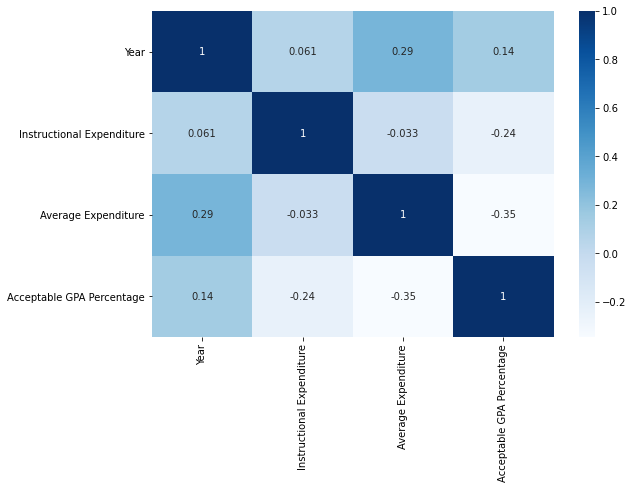

In [256]:
fix, hm = plt.subplots(figsize=(9,6))
sns.heatmap(education_data.corr(), annot=True, cmap='Blues')
display(hm)

**Plots**\
Looking at the heatmap, it is seen that the instruction expenditure has a positive correlation with the number of enrolled student, and this is to be expected. Normally, the more enrolled students in a state, the higher the instruction expenditure. However, what is quite surprising to me is that there is a negative correlation between Instructional/Average Expenditure Per Student and Acceptable GPA. My initial thoughts was that these two would have a positive correlation, not a negative one. Next I will plot some graphs just for visual representations. 

To create the plots, I need to format the dataframe we have above. For the plots, I need each line/scatter to represent either a state each, or a year each. To separate the dataframe by state or year, we use a function called [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). This function will help us create multiple dataframes, separated by one condition - the new dataframes are distinguished by different target column value in each of the datasets. The documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) contains all the information you may need about this function. For the plots itself, I am using subplots, as before, but this time I had 3 different subplots. Each plot is indexed like a list/array, so you can access each subplot by indexing them. I use matplotlib's set functions to set the labels and titles for each plots.

#### Plot of Year vs Instruction Expenditure (State-wise)

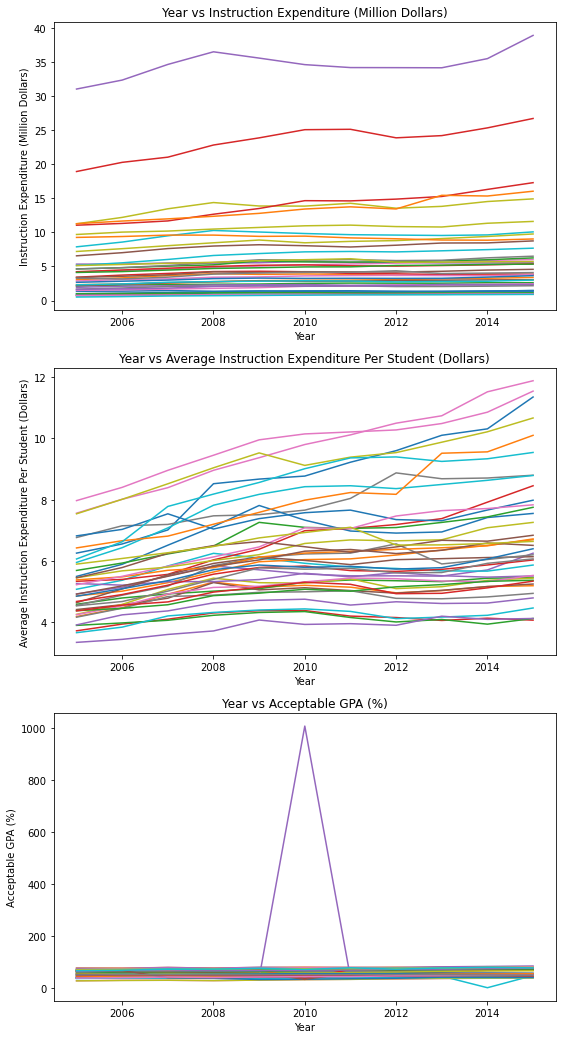

In [242]:
# Creates multiple dataframes corresponding to a single state each
state_separated = [x for _, x in education_data.groupby(['State Code'])]

# creates the figure, and sets labels and title
fig, ax = plt.subplots(3, figsize=(9,18))
ax[0].set_ylabel('Instruction Expenditure (Million Dollars)')
ax[0].set_xlabel('Year')
ax[0].set_title('Year vs Instruction Expenditure (Million Dollars)')

ax[1].set_ylabel('Average Instruction Expenditure Per Student (Dollars)')
ax[1].set_xlabel('Year')
ax[1].set_title('Year vs Average Instruction Expenditure Per Student (Dollars)')

ax[2].set_ylabel('Acceptable GPA (%)')
ax[2].set_xlabel('Year')
ax[2].set_title('Year vs Acceptable GPA (%)')

# plotting the scatter plot of Year vs Instruction Expenditure (Million Dollars)
for df in state_separated:
    ax[0].plot(df['Year'], df['Instructional Expenditure']/(10**6))
    ax[1].plot(df['Year'], df['Average Expenditure'])
    ax[2].plot(df['Year'], df['Acceptable GPA Percentage'])    

**Outliers**\
From the plots seen above, the first 2 plots looks as expected - instructional expenditure is increasing. Although, for some states, the total instructional expenditure fluctuates, the average expenditure per student shows that the monetary value being spent for a student is overall an increasing trend. However, the last plot of Average GPA over time has some questionable values. In 2010, it shows a state had acceptable GPA percentage of over 1000, and since the percentage scale is from 0 to 100 for this dataset, that is not possible. There are also some instances where the acceptable GPA percentage is around 0, and if it is absolutely 0, I will conclude that those data are not correct. I will do this fix/filter in the code block below, and plot a new Average GPA graph.

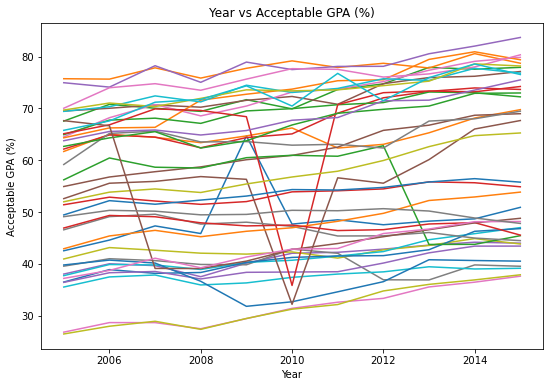

In [243]:
# filtering out GPA of more than 4, and less than/equal to 0.
education_data = education_data[~(education_data['Acceptable GPA Percentage'] > 100)]
education_data = education_data[~(education_data['Acceptable GPA Percentage'] <= 0)]

# Creates multiple dataframes corresponding to a single state each again, since we have fixed/modified the original dataset
state_separated = [x for _, x in education_data.groupby(['State Code'])]

# creates the figure, and sets labels and title
fig, bx = plt.subplots(figsize=(9,6))

bx.set_ylabel('Acceptable GPA (%)')
bx.set_xlabel('Year')
bx.set_title('Year vs Acceptable GPA (%)')

# plotting the scatter plot of Year vs Instruction Expenditure (Million Dollars)
for df in state_separated:
    bx.plot(df['Year'], df['Acceptable GPA Percentage'])    

## Linear Regression and Hypothesis Testing

Before I proceed with finding out if there are any correlation between the average instructional expenditure per student and percentage of students achieving an acceptable GPA, I need to set some hypothesis, which we will test. [Hypothesis testing](https://www.investopedia.com/terms/h/hypothesistesting.asp) is "an act in statistics whereby an analyst tests an assumption regarding a population parameter." Simply, it is where we make an assumption, and test our dataset to see if our assumption is right. 

For this project, my null hypothesis, denoted as $H_{0}$, is that there is a relation between average instructional expenditure per student and the acceptable GPA percentage. The significance level, denoted as $\alpha$, is 0.05. That says that if we get a p-value, which is probability, of less than 0.05, we can reject our null hypothesis. 

But first, lets create a linear regression of average instructional expenditure and acceptable GPA percentage. Our independent variable will be the average instructional expenditure, and our dependent variable is the acceptable GPA percentage. The formula will look like this:

\begin{equation}
Acceptable\;GPA\;Percentage\;=\;slope\;\times\;Average\;Instructional\;Expenditure\;Per\;Student\;+\;intersect
\end{equation}

where slope and intersect are the values to be found using linear regression. We will be using [sk-learn](https://scikit-learn.org/stable/) (short for sckit-learn) for our linear regression model. SK-Learn one of the most popular machine learning libraries, built for python.

In [244]:
# list to store our x (independent variable) and y (dependent variable)
x = []
y = []

# keeping a copy for the p-value evaluation
x_copy = x.copy()

# goes through the dataset and extracts the variables
for i, row in education_data.iterrows():
    x.append(row['Average Expenditure'])
    y.append(row['Acceptable GPA Percentage'])
    
# creates the Linear Regression model from SK-Learn
lin = LinearRegression()

x = np.array(x).reshape(-1, 1)

lin.fit(x, y)

display(Math(r'Acceptable GPA Percentage = {} \times Average Instructional Expenditure Per Student + {}'.format(round(lin.coef_[0],3),round(lin.intercept_,3))))

<IPython.core.display.Math object>

From our result, we can see that the slope is -3.071, therefore there is a downward trend. This means as the average instructional expenditure goes up, the acceptable GPA goes down. But is this enough to reject our null hypothesis? Not really. I can calculate our p-value and get a definite answer. But before we do that, lets plot a graph of this linear regression model to take a look at how close our model is.

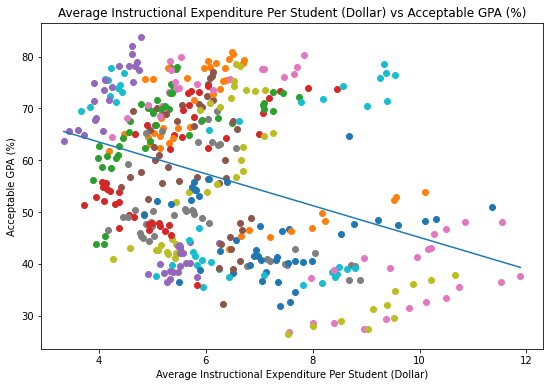

In [245]:
# creates the figure, and sets labels and title
fig, cx = plt.subplots(figsize=(9,6))

cx.set_ylabel('Acceptable GPA (%)')
cx.set_xlabel('Average Instructional Expenditure Per Student (Dollar)')
cx.set_title('Average Instructional Expenditure Per Student (Dollar) vs Acceptable GPA (%)')

# list to store the extracted 
expenditure_val = []

# plotting the scatter plot of Year vs Instruction Expenditure (Million Dollars)
for df in state_separated:
    cx.scatter(df['Average Expenditure'], df['Acceptable GPA Percentage'])
    expenditure_val.extend(df['Average Expenditure'].values)
    
# sorts the values
expenditure_val.sort()
y_val = []

# calculates the acceptable GPA according to our model
for x in expenditure_val:
    y_val.append(lin.coef_[0]*x + lin.intercept_)

# plots the linear regression line according to our model
cx.plot(expenditure_val, y_val)

**P-Value**\
From the plot above, we can see that there seems to be a negative correlation between the average instructional expenditure per student and the acceptable GPA percentage.  Let us calculate the p-value as well, to get a further clarification. I will be using [scipy's stats](https://docs.scipy.org/doc/scipy/reference/stats.html) function - specifically the pearsonr. Pearsonr is the Pearson correlation coefficient, which will give us the p-value once we give it two lists.

In [246]:
# list to store our x (independent variable) and y (dependent variable) again, because we modified them earlier.
x = []
y = []

# goes through the dataset and extracts the variables
for i, row in education_data.iterrows():
    x.append(row['Average Expenditure'])
    y.append(row['Acceptable GPA Percentage'])

# Using scipy's stats function to calculate the p-value
stat, p = pearsonr(x, y)

print(' p-value = %.3f' % (p))

 p-value = 0.000


**Interaction Terms**\
Well, we got a p-value of 0, which is below our significance level, therefore we can reject the null hypothesis. However, we also have variables such as year and state in our dataset. Could those be used to create a better model? The answer is yes. We call these type of variables interaction terms, and can include those in our model to get a better model. To do this, I will be using a library called [statsmodels](https://www.statsmodels.org/stable/index.html). This library provides many tools to make estimations on statistical models, while requiring very little user input. Majority of its tasks are automated. From statsmodels, we will use [ols](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) to create the model, and it will return the statistical results.

In [255]:
# keeping only the variables which OLS will use
interaction_model = education_data[['State Code', 'Acceptable GPA Percentage', 'Average Expenditure', 'Year']]

# renaming the columns for easier use
interaction_model.columns = ['State', 'GPA', 'Expenditure', 'Year']

# uses statsmodel's guide (https://www.statsmodels.org/devel/example_formulas.html) to add all the interactive term
mod = smf.ols(formula = 'GPA ~ State * Expenditure * Year', data = interaction_model)

# fitting the variables to get the optimal model from OLS
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     72.62
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          2.09e-167
Time:                        00:27:23   Log-Likelihood:                -980.83
No. Observations:                 438   AIC:                             2282.
Df Residuals:                     278   BIC:                             2935.
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

**Summary & Conclusion**\
For the table above, I will be using [this guide](https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01) to decode the table. If you look at the entry 'Prob (F-Statistic)', it is  2.09e-167. That value represents the overall significance of the regression, and the value is basically 0. Therefore, there is no positive correlation between average expenditure and acceptable GPA percentage, even after accounting for the state and year. Therefore, even after accounting for the state and year, we do not see a high enough P-Value to support our null hypothesis, therefore we have to reject our null hypothesis.

Throughout this tutorial, we imported the datasets, merged, formatted, analyzed, and manipulated them to see if we can come to a null hypothesis and test it. We failed to prove our null hypothesis correct, therefore we had to reject it. With the use of multiple different libraries, we were able to achieve this. Data science is not a lot of memorizing, but instead it is a lot about knowing what and when to use certain tools. For python, there are A LOT of libraries one can utilize. The methodology I took for this tutorial could have been shortened, or even been longer. However, the main thing to take away from this is that we clarify our assumptions and changes while we are assessing the data. Without clarifications, our data will not really make sense, nor will it have the right foundations and backings to be used. 